In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

/Users/adishrao/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
basedir = '/Users/adishrao/Desktop/FB/fbdata/'
img_dir_org = basedir
image_paths = open(basedir+'/images.txt').read().split()
label_paths = open(basedir+'/labels.txt').read().split()

labelled_image_paths = []

for lbl in label_paths:
    folder, label_file = lbl.split('/')
    image_file = label_file[6:-4]
    image_path = '/'.join([folder,image_file]) + '.png'
    
    if image_path not in image_paths: 
        print('Error! We seem to have made a wrong image path: ', image_path)
    
    labelled_image_paths.append(image_path)

In [3]:
images_org = sorted(labelled_image_paths)
labels_org = sorted(label_paths)


width, height = 160, 96
nc = 4
X_org = []
Y_org = []   
        
for img_path, lbl_path in list(zip(images_org,labels_org))[:]:
    try:
        # load image and label, resize, append
        img1 = cv2.imread(basedir + img_path)
        img1 = np.float32(img1)/255 # - 1 #averagin values. sohuld we remove?
        X_org.append(img1)
        lbl = np.load(basedir + lbl_path)
        Y_org.append(lbl)
    except Exception as e:
        print(e)
X_org , Y_org = np.array(X_org) , np.array(Y_org)

In [4]:
def find_middle(X):
    for i,r in enumerate(X):
        if 3 in r:
            break
    rowstart  = i
    for i,r in enumerate(X[::-1]):
        if 3 in r:
            break
    rowend  = 95 - i
    
    for j in range(160):
        if 3 in X[:,j]:
            break
    colstart = j
    colend = 0
    for r in X:
        for index,j in enumerate(r):
            if j == 3:
                if index>colend:
                    colend = index
    return (int((rowstart+rowend)/2), int((colstart+colend)/2) )

In [5]:
xy_list = []
X_eyes = []
Y_eyes = []
i = 0
for predict,img,labels in zip(Y_org,X_org,Y_org):
    midY, midX = find_middle(predict)
    if midX <16:
        midX = 16
    if midX > (159-16):
        midX = 159 - 16
    if midY <16:
        midY = 16
    if midY > (95-16):
        midY = 95 - 16
    new_X = img[(midY-16):(midY+16),(midX-16):(midX+16)]
    new_Y = labels[(midY-16):(midY+16),(midX-16):(midX+16)]
    if new_X.shape != (32,32,3):
        print(i,new_X.shape)
    X_eyes.append(new_X)
    Y_eyes.append(new_Y)
    i+=1
    xy_list.append([midX,midY])
X_eyes = np.array(X_eyes)
Y_eyes = np.array(Y_eyes)

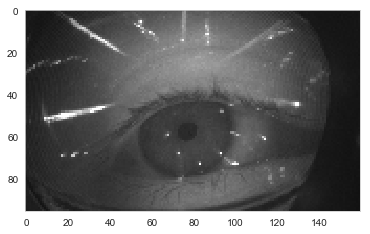

In [6]:
plt.imshow(X_org[0])

In [10]:
for row in Y_eyes:
    for i in row:
        for index, item in enumerate(i):
            if item != 3:
                i[index] = 0
            else:
                i[index] = 1

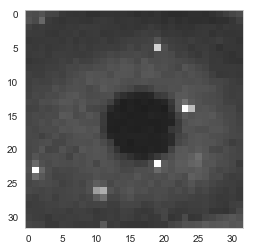

In [7]:
plt.imshow(X_eyes[30])

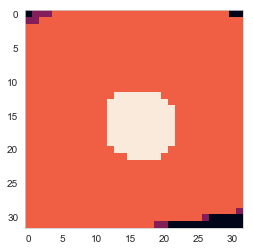

In [9]:
plt.imshow(Y_eyes[30])

In [12]:
import matplotlib
save_path = '/Users/adishrao/Desktop/FB/fbdata eyes/'
save_path_1 = '/Users/adishrao/Desktop/FB/fbdata eyes/'
i = 0
for img_path,label_path,x_val,y_val in zip(images_org,labels_org,X_eyes,Y_eyes):
    try:
        if not os.path.exists(save_path+img_path[:img_path.index('/')]):
            os.makedirs(save_path+img_path[:img_path.index('/')])
        matplotlib.image.imsave(save_path+img_path, cv2.cvtColor(x_val, cv2.COLOR_BGR2RGB))
        np.save(save_path_1+label_path,y_val)
    except Exception as e:
        print(e)
        print(img_path,i)
    i+=1